<a href="https://colab.research.google.com/github/prakher2pratyush/exploratory_data_analysis/blob/main/exploratory_data_analysis_haberman_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


The Haberman dataset is a collection of details and survival status for patients who have undergone Breast Cancer surgery.

*   Columns

  *   Age : Patient age at the time of surgery.
  *   Op_Year : Year of surgery.
  *   axil_nodes : Number of Axil Nodes or Axillary lymph nodes found in patient.
  *   Surv_status : 1 or 2 based on number of years patient survived ater surgery.
      *   1 for Long term survivors i.e. > 5 years
      *   2 for Short term survival i.e. < 5 years

Source : https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

haberman_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/haberman.csv", names = ["Age", "Op_Year", "axil_nodes", "Surv_status"])
print("Dataset : ")
print(haberman_dataset)

Dataset : 
     Age  Op_Year  axil_nodes  Surv_status
0     30       64           1            1
1     30       62           3            1
2     30       65           0            1
3     31       59           2            1
4     31       65           4            1
..   ...      ...         ...          ...
301   75       62           1            1
302   76       67           0            1
303   77       65           3            1
304   78       65           1            2
305   83       58           2            2

[306 rows x 4 columns]


# Objective

**Perform Exploratory Data Analysis on Haberman Dataset to understand which features or combination of features can be used for classification of Patient's survival rate.**
1.   Check high level statistics of the dataset.
2.   Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
3.   Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.



# High Level Statistics

In [ ]:
print("Data-points : " + str(haberman_dataset.shape[0]))
print("Features : " + str(haberman_dataset.shape[1]))
print("Columns : ")
print(haberman_dataset.columns)
print("------------------------------------------------------")
print("Classes and number of data-points per class : ")
print(haberman_dataset["Surv_status"].value_counts())
print("------------------------------------------------------")

Data-points : 306
Features : 4
Columns : 
Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')
------------------------------------------------------
Classes and number of data-points per class : 
1    225
2     81
Name: Surv_status, dtype: int64
------------------------------------------------------


# Univaraite analysis

### PDF and CDF

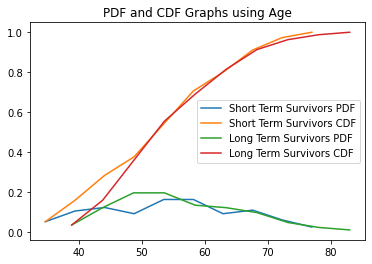

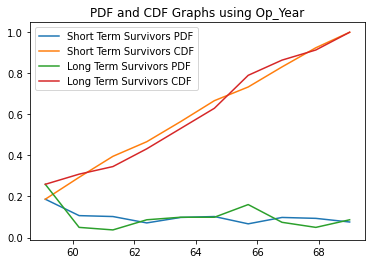

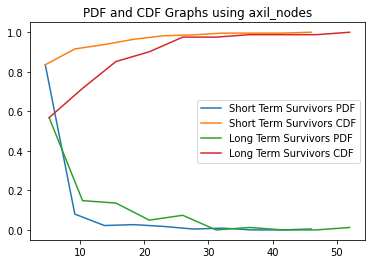

In [ ]:
survival_satus_1 = haberman_dataset.loc[haberman_dataset["Surv_status"] == 1]
survival_satus_2 = haberman_dataset.loc[haberman_dataset["Surv_status"] == 2]

for feature in haberman_dataset.columns[:-1]:

  counts, bin_edges = np.histogram(survival_satus_1[feature], bins=10, 
                                    density = True)
  pdf = counts/(sum(counts))
  cdf = np.cumsum(pdf)
  plt.plot(bin_edges[1:],pdf, label = "Short Term Survivors PDF")
  plt.plot(bin_edges[1:],cdf, label = "Short Term Survivors CDF")

  counts, bin_edges = np.histogram(survival_satus_2[feature], bins=10, 
                                    density = True)
  pdf = counts/(sum(counts))
  cdf = np.cumsum(pdf)
  plt.plot(bin_edges[1:],pdf, label = "Long Term Survivors PDF")
  plt.plot(bin_edges[1:],cdf, label = "Long Term Survivors CDF")
    
  plt.title("PDF and CDF Graphs using " + feature)
  plt.legend()
  plt.show()
  plt.close()

## Boxplot

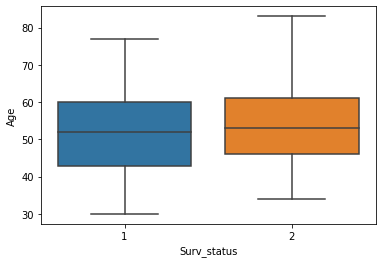

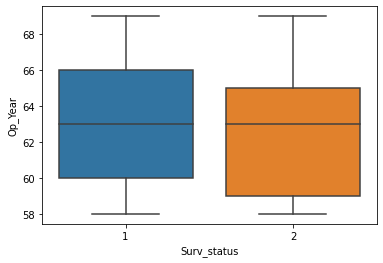

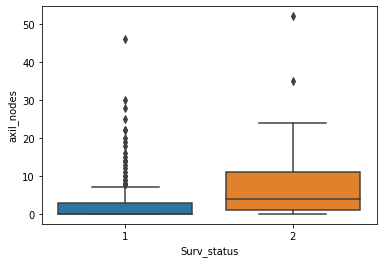

In [ ]:
for feature in haberman_dataset.columns[:-1]:
  sns.boxplot(x = "Surv_status" ,y = feature, data = haberman_dataset)
  plt.show()

## Violin plots

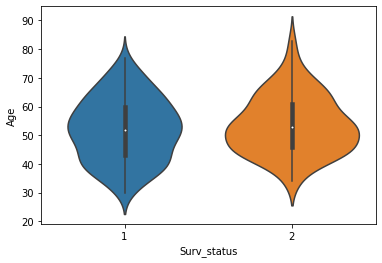

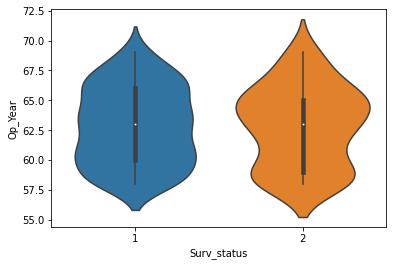

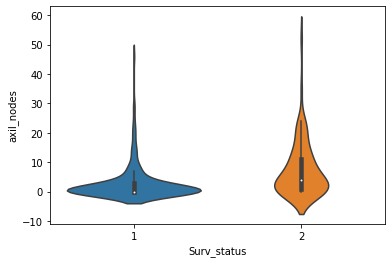

In [ ]:
for feature in haberman_dataset.columns[:-1]:
  sns.violinplot(x = "Surv_status" ,y = feature, data = haberman_dataset)
  plt.show()

# Bi-variate analysis

## Scatter-plot

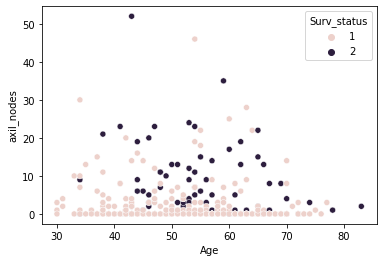

In [ ]:
# Plotting scatter plot only between Age and axil_nodes based on observations from below pair plot.

sns.scatterplot(data = haberman_dataset, x = "Age", y = "axil_nodes", hue = "Surv_status")

## Pair-plots

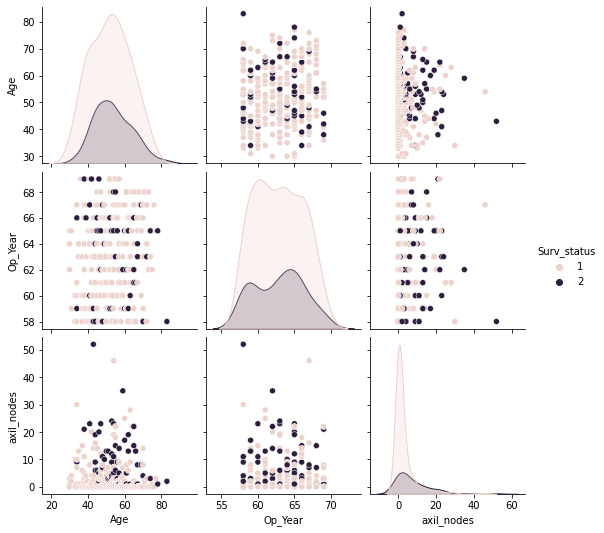

In [ ]:
sns.pairplot(haberman_dataset, hue = "Surv_status")

# Observations



*    PFB the observations based on above Univaraite analysis.
    *    An ideal linear seperation of points is not possible.
    *    The graph shows that ~100% of patients with survival status 1 lie between 0 to 10 axil_nodes whereas less then 75% patients with survival status 2 lie between 0 to 10 axil_nodes.
    *    ~75% of survival status 1 patients have less then 5 axil_nodes whereas, only 50% of survival status 2 patients have less then 5 axil_nodes.
    *    More then 50% of survival status 1 patients have less then 2 axil_nodes whereas, only ~25% of survival status 2 patients have less then 2 axil_nodes.
    *    **Based on above data, we can conclude that axil_nodes feature will be most useful towards classification.**
*    PFB the observations based on above Bi-variate analysis.
    *    After analysing scatter plot between different features, we can see a high concentration of patients with survival status 1 where axil_nodes are between 0 to 3 and age 30 to 75 whereas patients with survival status 2 is scattered where axil_nodes are between 3 to 25 and age between 40 to 70.
    *    **Based on above data, we can conclude that axil_nodes and age will be most useful towards classification.**